In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway

In [2]:
df=pd.read_csv("../data/preprocessed_data.csv")

In [3]:
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,0,0.639085,0.490909,0.583426,67,0.425887,40,0,4
1,2,OnePlus 9,0,0.419014,0.336364,0.382386,42,0.351566,47,1,3
2,3,Xiaomi Mi 11,0,0.218310,0.272727,0.170569,32,0.091858,42,0,2
3,4,Google Pixel 5,0,0.367958,0.345455,0.510591,56,0.321086,20,0,3
4,5,iPhone 12,1,0.276408,0.300000,0.395764,58,0.369937,31,1,3


#### Hypothesis Testing

#### Do extreme users (Class 5) have significantly higher screen-on time?



Class 5 vs Other Classes: t-statistic = 32.44157588647852, p-value = 1.720708987024662e-141


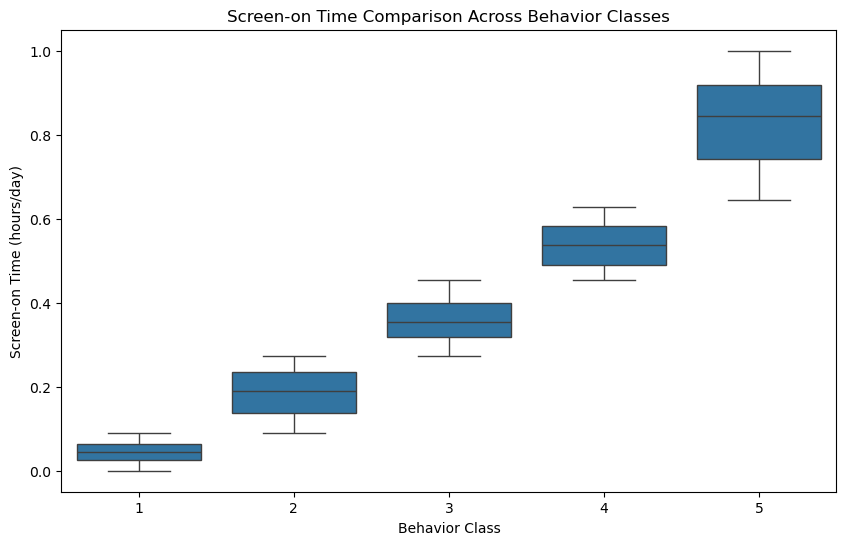

In [ ]:


# Filter the data for Class 5 (extreme users)
class_5_data = df[df['User Behavior Class'] == 5]['Screen On Time (hours/day)']
other_classes_data = df[df['User Behavior Class'] != 5]['Screen On Time (hours/day)']

# Perform t-test to compare screen-on time between Class 5 and other classes
from scipy.stats import ttest_ind
t_stat_class_5, p_value_class_5 = ttest_ind(class_5_data, other_classes_data)
print(f"Class 5 vs Other Classes: t-statistic = {t_stat_class_5}, p-value = {p_value_class_5}")
# Visualization: Box plot comparing screen-on time across behavior classes
plt.figure(figsize=(10,6))
sns.boxplot(x='User Behavior Class', y='Screen On Time (hours/day)', data=df)
plt.title('Screen-on Time Comparison Across Behavior Classes')
plt.xlabel('Behavior Class')
plt.ylabel('Screen-on Time (hours/day)')
plt.savefig('../visualizations/screen_on_time_class.png')
plt.show()





The very small p-value (far below 0.05) indicates that there is a statistically significant difference in screen-on time between extreme users (Class 5) and other behavior classes. In other words, Class 5 (extreme users) has significantly higher screen-on time compared to the other classes.

#### Does gender impact screen-on time?


Gender Comparison: t-statistic = 0.09440784461385819, p-value = 0.9248122785055027


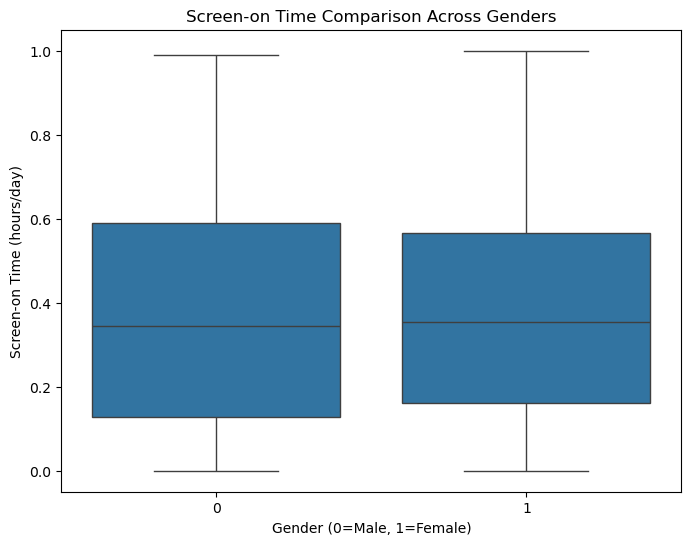

In [20]:
# Hypothesis 2: Does gender impact screen-on time?

# Separate the data by gender
male_data = df[df['Gender'] == 0]['Screen On Time (hours/day)']
female_data = df[df['Gender'] == 1]['Screen On Time (hours/day)']

# Perform t-test to compare screen-on time between genders
t_stat_gender, p_value_gender = ttest_ind(male_data, female_data)

# Results

print(f"Gender Comparison: t-statistic = {t_stat_gender}, p-value = {p_value_gender}")

# Visualization: Box plot comparing screen-on time across behavior classes

# Visualization: Box plot comparing screen-on time across gender
plt.figure(figsize=(8,6))
sns.boxplot(x='Gender', y='Screen On Time (hours/day)', data=df)
plt.title('Screen-on Time Comparison Across Genders')
plt.xlabel('Gender (0=Male, 1=Female)')
plt.ylabel('Screen-on Time (hours/day)')
plt.savefig('../visualizations/screen_on_time_gender.png')
plt.show()

The p-value is very large (greater than 0.05), suggesting that there is no statistically significant difference in screen-on time between males and females. Therefore, gender does not have a significant impact on screen-on time.